In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
sns.set()

In [7]:
tips = pd.read_csv('./dataset/tips.csv')
dots = pd.read_csv('./dataset/dots.csv')

In [9]:
# dots

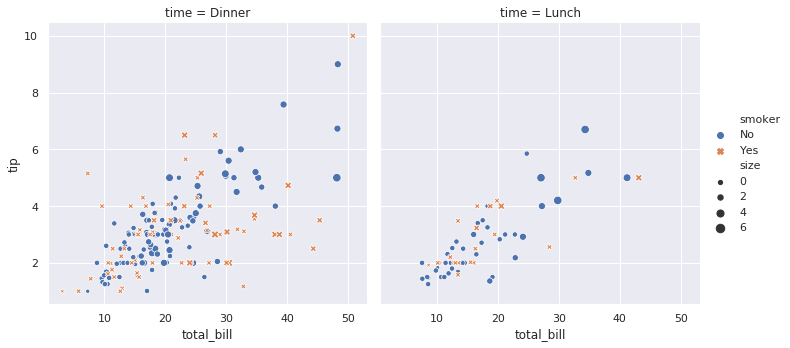

In [10]:
# `hue` and `style` set to their catolog
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

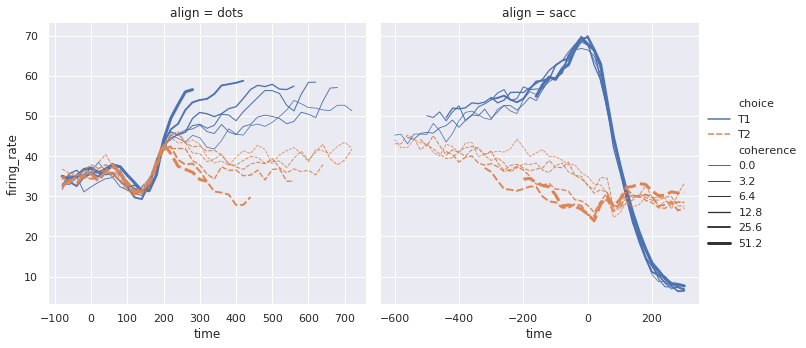

In [11]:
# kind='link' let it become `line`.
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

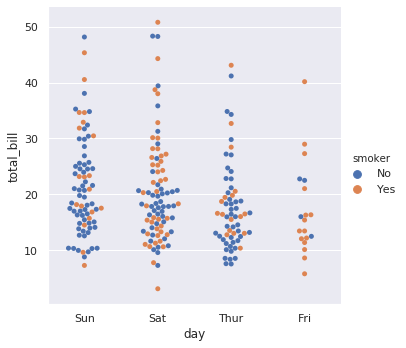

In [12]:
# cat, `x` or `y` 可以是离散的
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips)

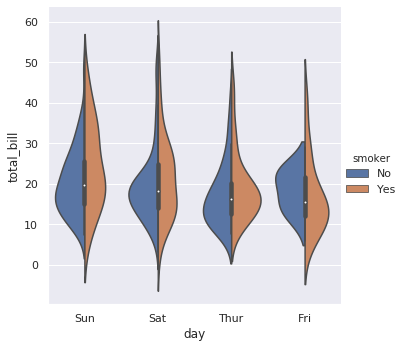

In [13]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips)

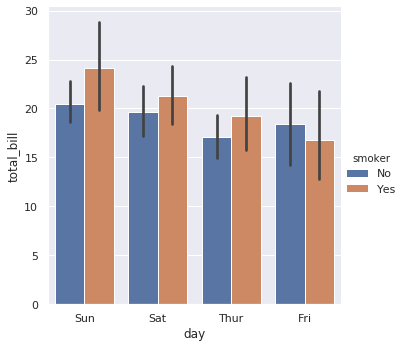

In [14]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips)

### galary

#### bar

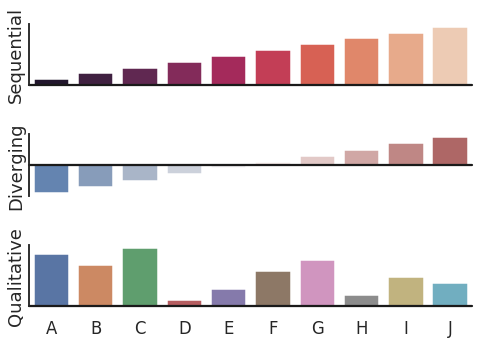

In [15]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

#### lmplot

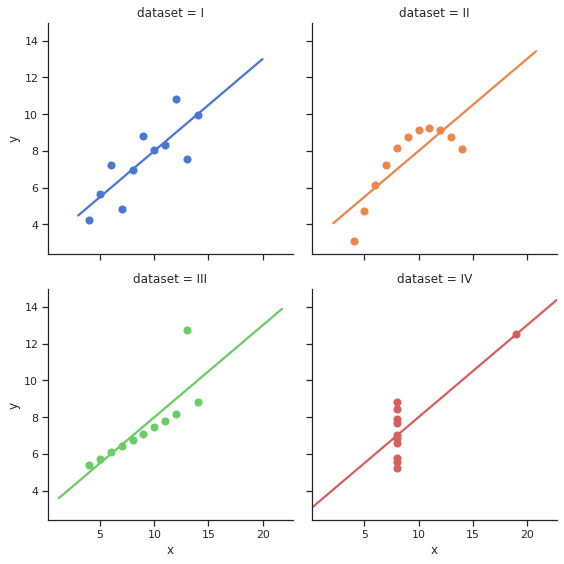

In [22]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
# df = sns.load_dataset("anscombe")
df = pd.read_csv('./dataset/anscombe.csv')

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

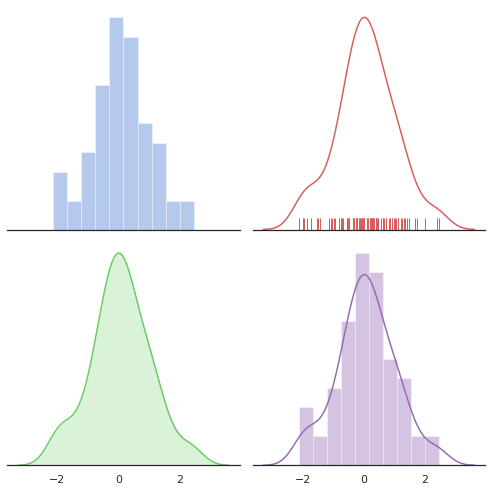

In [17]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

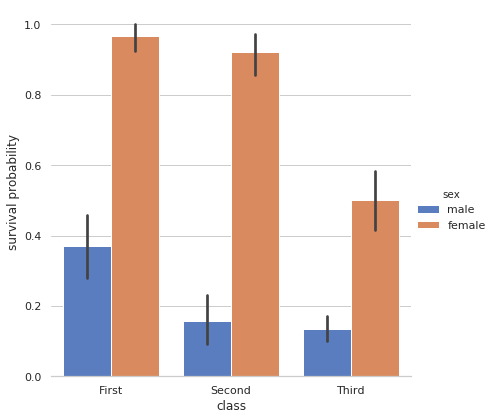

In [18]:
sns.set(style="whitegrid")

# Load the example Titanic dataset
# titanic = sns.load_dataset("titanic")
titanic = pd.read_csv('./dataset/titanic.csv')

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

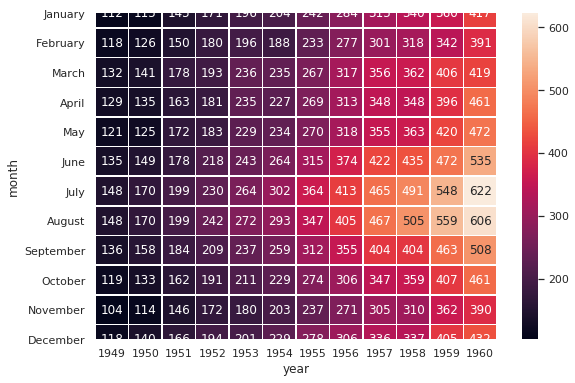

In [19]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
# flights = flights_long.pivot("month", "year", "passengers")
flights = pd.read_csv('./dataset/flights_long.csv')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

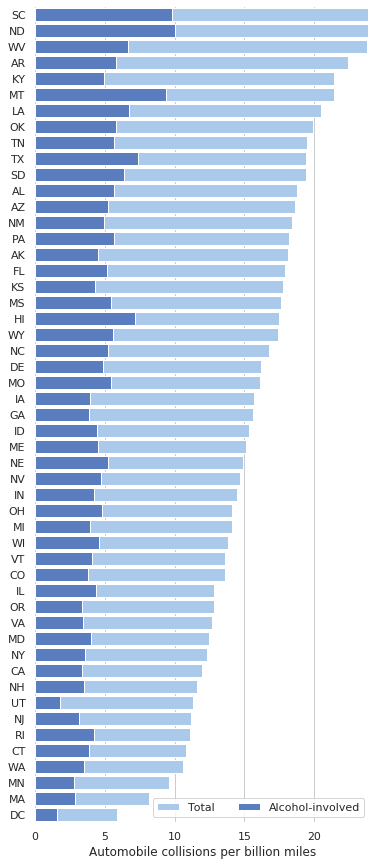

In [20]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = pd.read_csv("./dataset/car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

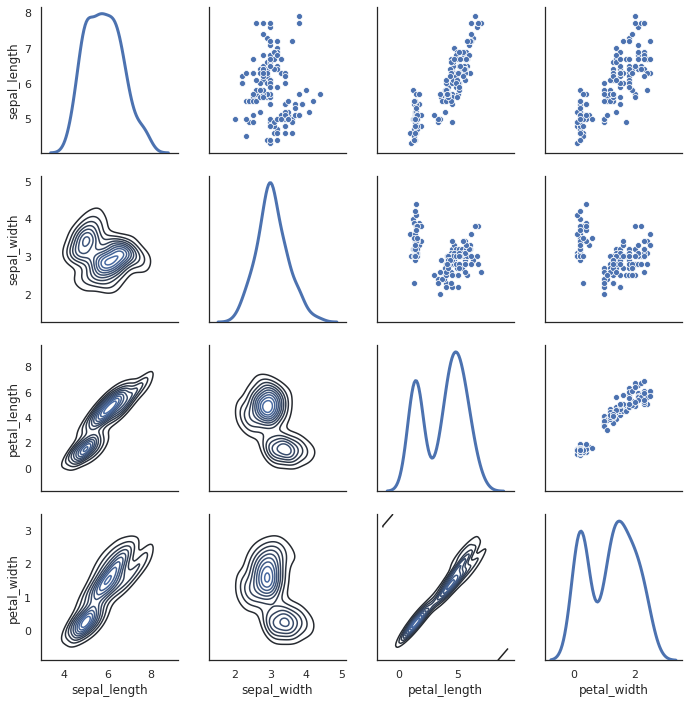

In [21]:
sns.set(style="white")

# df = sns.load_dataset("iris")
df = pd.read_csv('./dataset/iris.csv')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


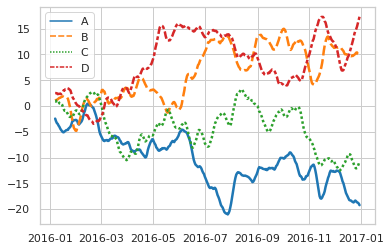

In [23]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

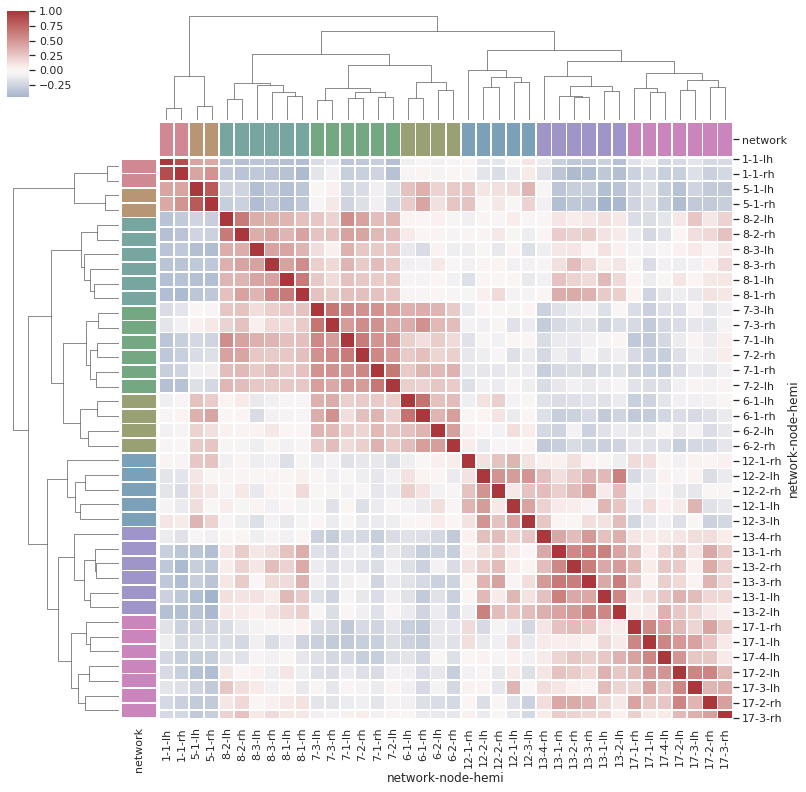

In [24]:
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

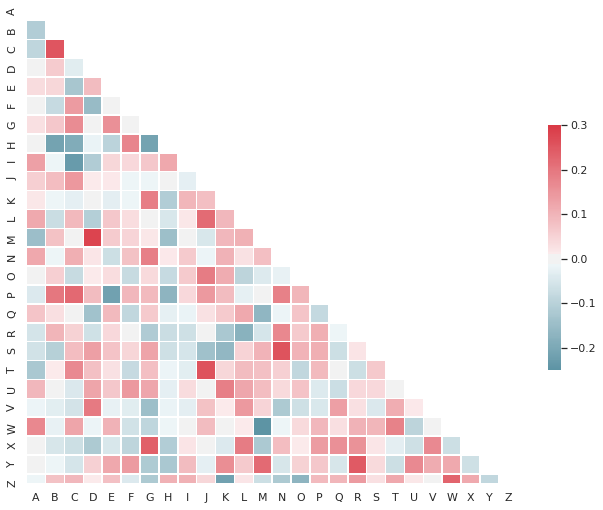

In [26]:
from string import ascii_letters
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

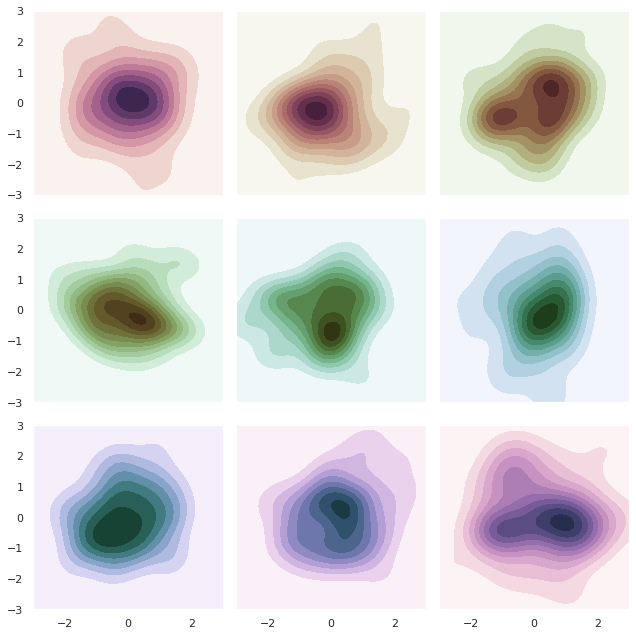

In [27]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

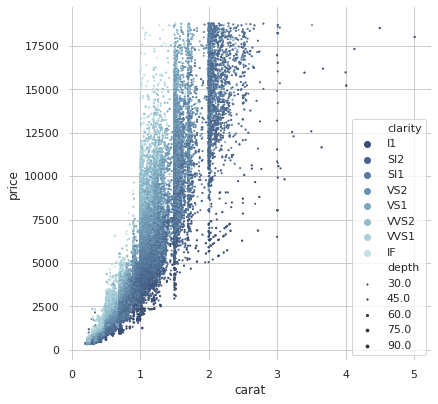

In [29]:
sns.set(style="whitegrid")

# Load the example iris dataset
# diamonds = sns.load_dataset("diamonds")
diamonds = pd.read_csv('./dataset/diamonds.csv')

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

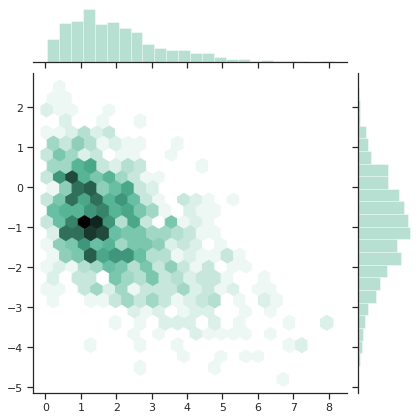

In [30]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")